In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
import scipy.stats as stats 
from scipy.stats import norm, skew, probplot
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.decomposition import PCA

In [32]:
from Feat_eng import (Y_train, X_train, Y_test, X_test, 
    c1_train, c2_train, c3_train, c1_test, c2_test, c3_test, 
    Y_c1train, Y_c2train, Y_c3train, Y_c1test, Y_c2test ,Y_c3test, zil_yr, target)

In [36]:
pd.set_option('display.max_columns', None)
target.head(10)

,RegionName,year,value,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,City,cpi,gdp,interest,zip,est,log_value,future_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster
0,01104,2014,946.100000,01104,3346.0,5526.0,1949.0,158.0,1597.0,523.0,325.0,327.0,603.0,333.0,327.0,340.0,25.0,22285.0,36.1,522.0,8872.0,29184.0,18029.0,9541.0,669.0,210.0

In [38]:
# could we use the zil_yr from original feature engineering?
zri_yr = target[['RegionName', 'year', 'value']].copy()
zri_yr

,RegionName,year,value
0,01104,2014,946.100000
1,01104,2015,972.583333
2,01104,2016,1058.666667
3,01104,2017,1129.166667
4,01104,2018,1125.083333
...,...,...,...
6067,98499,2014,979.000000
6068,98499,2015,995.833333
6069,98499,2016,1036.166667
6070,98499,2017,1154.833333


In [6]:
# ZORI DF from zillow
zori = pd.read_csv('../data/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')
zori

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08
0,61639,10025,1,"New York, NY",2883.0,2898.0,2913.0,2928.0,2942.0,2957.0,...,2931.0,2929.0,2928.0,2931.0,2935.0,2938.0,2946.0,2953.0,2961.0,2972.0
1,84654,60657,2,"Chicago, IL",1364.0,1369.0,1374.0,1379.0,1384.0,1388.0,...,1548.0,1547.0,1546.0,1546.0,1546.0,1546.0,1546.0,1546.0,1546.0,1547.0
2,61637,10023,3,"New York, NY",3004.0,3014.0,3024.0,3033.0,3042.0,3051.0,...,2936.0,2933.0,2931.0,2933.0,2936.0,2938.0,2945.0,2951.0,2958.0,2968.0
3,91982,77494,4,"Houston, TX",1362.0,1359.0,1356.0,1353.0,1350.0,1348.0,...,1358.0,1369.0,1380.0,1391.0,1403.0,1415.0,1427.0,1440.0,1452.0,1465.0
4,84616,60614,5,"Chicago, IL",1669.0,1674.0,1679.0,1683.0,1688.0,1693.0,...,1894.0,1896.0,1899.0,1903.0,1906.0,1910.0,1915.0,1921.0,1926.0,1933.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,95039,85701,8456,"Tucson, AZ",NaN,851.0,849.0,847.0,846.0,845.0,...,1156.0,NaN,1174.0,1185.0,1196.0,1206.0,1217.0,1228.0,1239.0,1250.0
2166,84608,60606,8497,"Chicago, IL",1978.0,1977.0,1976.0,1975.0,1975.0,1974.0,...,2005.0,2008.0,2012.0,2018.0,2024.0,2031.0,2040.0,2050.0,2059.0,2072.0
2167,61620,10006,8506,"New York, NY",2986.0,3002.0,3017.0,3032.0,3048.0,3064.0,...,2885.0,2872.0,2860.0,2854.0,2849.0,2843.0,2843.0,2843.0,2843.0,2847.0
2168,58623,2109,8792,"Boston, MA",NaN,2932.0,NaN,2946.0,2953.0,2959.0,...,3010.0,3010.0,3009.0,3013.0,3016.0,3020.0,3027.0,3033.0,3040.0,3049.0


In [7]:
# converting zip column (RegionName) to string and filling with 0s
zori['RegionName'] = zori['RegionName'].astype(str).str.zfill(5)

# flattening monthly rent indices
cols_replace = list(zori.columns)[4:]
cols_keep = list(zori.columns)[:4]
zori_new = zori.melt(id_vars=cols_keep, value_vars = cols_replace)

# converting month column to datetime object and pulling year
zori_new['variable']= pd.to_datetime(zori_new['variable'])
zori_new['year'] = zori_new['variable'].apply(lambda a: a.year)

# grouping by year column and calculating mean
zori_yr = zori_new.groupby(['RegionName', 'year']).mean().reset_index()

# dropping non used columns
zori_yr.drop(['SizeRank','RegionID'], inplace=True, axis=1)

In [8]:
# zori_tot - zori data from all years
zori_tot = zori_yr.copy()

In [75]:
zri_yr[zri_yr['RegionName']== '01604']

,RegionName,year,value
210,01604,2011,954.714286
211,01604,2012,1004.250000
212,01604,2013,1066.833333
213,01604,2014,1117.333333
214,01604,2015,1136.333333
215,01604,2016,1197.333333
216,01604,2017,1241.750000
217,01604,2018,1311.833333


In [76]:
zori_yr[zori_yr['RegionName']== '01604']

,RegionName,year,value
0,01604,2014,1087.000000
1,01604,2015,1153.583333
2,01604,2016,1220.666667
3,01604,2017,1284.250000
4,01604,2018,1359.416667
5,01604,2019,1442.583333
6,01604,2020,1522.250000
7,01604,2021,1641.125000


In [50]:
zori_yr

,RegionName,year,value
0,01604,2014,1087.000000
1,01604,2015,1153.583333
2,01604,2016,1220.666667
3,01604,2017,1284.250000
4,01604,2018,1359.416667
...,...,...,...
17355,99207,2017,1074.000000
17356,99207,2018,1126.000000
17357,99207,2019,1216.583333
17358,99207,2020,1281.363636


In [11]:
print(type(zori_yr['RegionName'].iloc[0]))
print(type(zri_yr['RegionName'].iloc[0]))

<class 'str'>
<class 'str'>


In [12]:
print(type(zori_yr['year'].iloc[0]))
print(type(zri_yr['year'].iloc[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


In [29]:
zri_yr.head(50)

,RegionName,year,value
0,01104,2014,946.100000
1,01104,2015,972.583333
2,01104,2016,1058.666667
3,01104,2017,1129.166667
4,01104,2018,1125.083333
5,01108,2011,1127.545455
6,01108,2012,1025.909091
7,01108,2013,1033.583333
8,01108,2014,1005.909091
9,01108,2015,1011.250000


In [24]:
zori_yr.head(50)

,RegionName,year,value
0,01604,2014,1087.000000
1,01604,2015,1153.583333
2,01604,2016,1220.666667
3,01604,2017,1284.250000
4,01604,2018,1359.416667
5,01604,2019,1442.583333
6,01604,2020,1522.250000
7,01604,2021,1641.125000
8,01702,2014,1519.285714
9,01702,2015,1552.375000


In [226]:
# # all zori indices (left join) mapped to zip/year with or without zri indices
# df_comb = zori_yr.merge(zri_yr, how='left',
#               left_on = ['RegionName', 'year'], 
#               right_on = ['RegionName', 'year'])
# df_comb.columns = ['RegionName', 'year', 'zori', 'zri']
# df_comb

,RegionName,year,zori,zri
0,01604,2014,1087.000000,1117.333333
1,01604,2015,1153.583333,1136.333333
2,01604,2016,1220.666667,1197.333333
3,01604,2017,1284.250000,1241.750000
4,01604,2018,1359.416667,1311.833333
...,...,...,...,...
17355,99207,2017,1074.000000,903.272727
17356,99207,2018,1126.000000,965.166667
17357,99207,2019,1216.583333,NaN
17358,99207,2020,1281.363636,NaN


In [227]:
# df_comb.isnull().sum()

RegionName        0
year              0
zori              0
zri           13401
dtype: int64

In [272]:
# # outer join of zori_yr and zri_year (more results than zori_yr left join)
# df_comb2 = zori_yr.merge(zri_yr, how='outer',
#               left_on = ['RegionName', 'year'], 
#               right_on = ['RegionName', 'year'])
# df_comb2.columns = ['RegionName', 'year', 'zori', 'zri']
# df_comb2

,RegionName,year,zori,zri
0,01604,2014,1087.000000,1117.333333
1,01604,2015,1153.583333,1136.333333
2,01604,2016,1220.666667,1197.333333
3,01604,2017,1284.250000,1241.750000
4,01604,2018,1359.416667,1311.833333
...,...,...,...,...
23735,99654,2014,NaN,1218.545455
23736,99654,2015,NaN,1228.000000
23737,99654,2016,NaN,1295.083333
23738,99654,2017,NaN,1322.083333


In [94]:
# all zri indices (left join) mapped to zip/year with or without zori indices
df_comb3 = zri_yr.merge(zori_yr, how='left',
              left_on = ['RegionName', 'year'], 
              right_on = ['RegionName', 'year'])
df_comb3.columns = ['RegionName', 'year', 'zri', 'zori']
df_comb3

,RegionName,year,zri,zori
0,01104,2014,946.100000,NaN
1,01104,2015,972.583333,NaN
2,01104,2016,1058.666667,NaN
3,01104,2017,1129.166667,NaN
4,01104,2018,1125.083333,NaN
...,...,...,...,...
6042,98499,2014,979.000000,NaN
6043,98499,2015,995.833333,NaN
6044,98499,2016,1036.166667,NaN
6045,98499,2017,1154.833333,NaN


In [95]:
df_comb3.isnull().sum()

RegionName       0
year             0
zri              0
zori          3343
dtype: int64

In [317]:
# # filtering zip codes we need 2019, 2020, and 2021 ZRI values for
# zri_regs = zri_yr['RegionName'].unique().tolist()
# len(zri_regs)
# zri_yr.RegionName.nunique()

1652

In [310]:
# df_comb2_reg = df_comb2[df_comb2['RegionName'].isin(zri_regs)]

In [331]:
# # zori indices for 2019, 2020, and 2021 for the zip codes we have in our dataset
# yrs_2 = [2019, 2020, 2021]
# df_comb2_reg = df_comb2_reg[df_comb2_reg['year'].isin(yrs_2)]
# df_comb2_reg.RegionName.nunique()

861

In [333]:
# # same as above -  confirming we only have zori scores for 861 of 1652 total zip codes
# zori_reg = zori_yr[zori_yr['RegionName'].isin(zri_regs)]
# zori_reg_yr = zori_reg[zori_reg['year'].isin(yrs_2)]
# zori_reg_yr.RegionName.nunique()

861

### Predicting ZRI with ZORI

In [96]:
df_comb3_red = df_comb3.dropna()
df_comb3_red

,RegionName,year,zri,zori
40,01604,2014,1117.333333,1087.000000
41,01604,2015,1136.333333,1153.583333
42,01604,2016,1197.333333,1220.666667
43,01604,2017,1241.750000,1284.250000
44,01604,2018,1311.833333,1359.416667
...,...,...,...,...
6037,98498,2014,1012.272727,912.250000
6038,98498,2015,1101.750000,965.333333
6039,98498,2016,1200.583333,1029.500000
6040,98498,2017,1297.833333,1135.000000


Text(0, 0.5, 'ZORI')

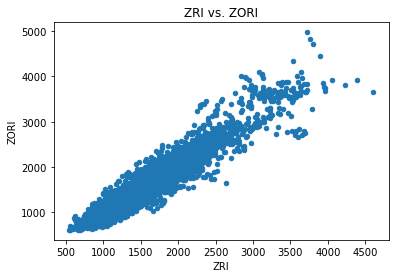

In [42]:
df_comb3_red.plot(kind='scatter', x='zori', y='zri')
plt.title('ZRI vs. ZORI')
plt.xlabel('ZRI')
plt.ylabel('ZORI')

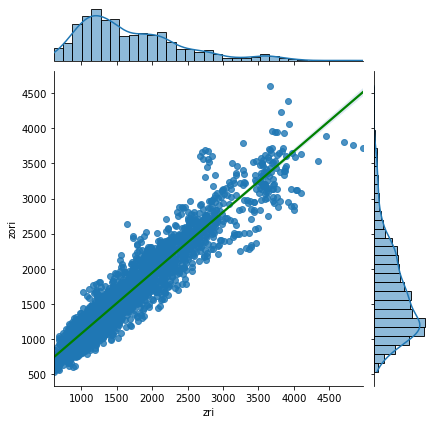

In [43]:
ind_plot = sns.jointplot(x="zri", y="zori", data=df_comb3_red, kind='reg')
regline = ind_plot.ax_joint.get_lines()[0]
regline.set_color('green')

<AxesSubplot:>

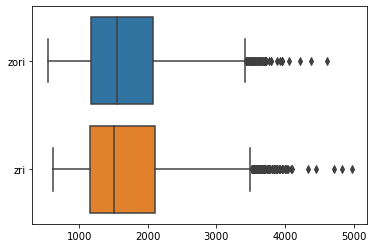

In [45]:
sns.boxplot(data = df_comb3_red[['zori', 'zri']], orient = 'h')

In [97]:
df_comb3_red.columns

Index(['RegionName', 'year', 'zri', 'zori'], dtype='object')

In [98]:
df_comb3_red['log_zri'] = np.log(df_comb3_red['zri'])
df_comb3_red['log_zori'] = np.log(df_comb3_red['zori'])

<ipython-input-98-ed2d9c9d88cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb3_red['log_zri'] = np.log(df_comb3_red['zri'])
<ipython-input-98-ed2d9c9d88cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb3_red['log_zori'] = np.log(df_comb3_red['zori'])


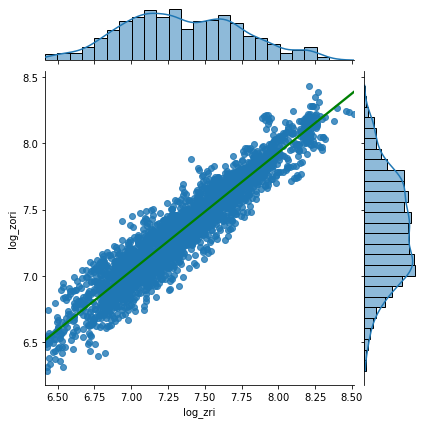

In [49]:
ind_plot = sns.jointplot(x="log_zri", y="log_zori", data=df_comb3_red, kind='reg')
regline = ind_plot.ax_joint.get_lines()[0]
regline.set_color('green')

### Regression w/ train-test split

In [99]:
df_comb3_red['year'] = df_comb3_red['year'] - 2013
df_comb3_red.head()

<ipython-input-99-fd88da8767ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb3_red['year'] = df_comb3_red['year'] - 2013


,RegionName,year,zri,zori,log_zri,log_zori
40,01604,1,1117.333333,1087.000000,7.018700,6.991177
41,01604,2,1136.333333,1153.583333,7.035562,7.050628
42,01604,3,1197.333333,1220.666667,7.087852,7.107152
43,01604,4,1241.750000,1284.250000,7.124277,7.157930
44,01604,5,1311.833333,1359.416667,7.179181,7.214811


In [60]:
x_train, x_test, y_train, y_test = train_test_split(df_comb3_red[['log_zori', 'year']], df_comb3_red[['log_zri']], test_size = 0.2)


In [62]:
lm = LinearRegression()
lm.fit(x_train, y_train)
print(f'R-squared: {lm.score(x_train, y_train)}')
print(f'Coefficient: {lm.coef_}')
print(f'Intercept: {lm.intercept_}')

R-squared: 0.8939020494868117
Coefficient: [[ 1.00899702 -0.0037013 ]]
Intercept: [-0.05530867]


In [66]:
pred = lm.predict(x_train)
mse = mean_squared_error(np.exp(y_train), np.exp(pred))
RMSE = np.sqrt(mse)
RMSE

234.19338191383775

In [65]:
pred = lm.predict(x_test)
mse = mean_squared_error(np.exp(y_test), np.exp(pred))
RMSE = np.sqrt(mse)
RMSE

226.32357163624556

In [100]:
test = df_comb3_red.copy()

In [101]:
test = test.groupby('year').mean(['zri', 'zori'])

In [102]:
test['zori_change'] = test['zori'].pct_change()
test['zri_change'] = test['zri'].pct_change()
test.head(50)

,zri,zori,log_zri,log_zori,zori_change,zri_change
year,,,,,,
1,1564.980709,1548.834392,7.269773,7.269846,NaN,NaN
2,1656.074589,1625.280861,7.323966,7.318036,0.049357,0.058208
3,1721.069978,1684.647002,7.367913,7.357725,0.036527,0.039247
4,1750.300592,1732.424957,7.387858,7.387802,0.028361,0.016984
5,1767.511396,1783.935891,7.402887,7.420030,0.029733,0.009833


In [117]:
df_comb3_red

,RegionName,year,zri,zori,log_zri,log_zori
40,01604,1,1117.333333,1087.000000,7.018700,6.991177
41,01604,2,1136.333333,1153.583333,7.035562,7.050628
42,01604,3,1197.333333,1220.666667,7.087852,7.107152
43,01604,4,1241.750000,1284.250000,7.124277,7.157930
44,01604,5,1311.833333,1359.416667,7.179181,7.214811
...,...,...,...,...,...,...
6037,98498,1,1012.272727,912.250000,6.919953,6.815914
6038,98498,2,1101.750000,965.333333,7.004655,6.872473
6039,98498,3,1200.583333,1029.500000,7.090563,6.936829
6040,98498,4,1297.833333,1135.000000,7.168451,7.034388


In [143]:
test3 = df_comb3_red.copy()
test3

,RegionName,year,zri,zori,log_zri,log_zori
40,01604,1,1117.333333,1087.000000,7.018700,6.991177
41,01604,2,1136.333333,1153.583333,7.035562,7.050628
42,01604,3,1197.333333,1220.666667,7.087852,7.107152
43,01604,4,1241.750000,1284.250000,7.124277,7.157930
44,01604,5,1311.833333,1359.416667,7.179181,7.214811
...,...,...,...,...,...,...
6037,98498,1,1012.272727,912.250000,6.919953,6.815914
6038,98498,2,1101.750000,965.333333,7.004655,6.872473
6039,98498,3,1200.583333,1029.500000,7.090563,6.936829
6040,98498,4,1297.833333,1135.000000,7.168451,7.034388


In [144]:
test3[['zri_pred']] = 0
test3

,RegionName,year,zri,zori,log_zri,log_zori,zri_pred
40,01604,1,1117.333333,1087.000000,7.018700,6.991177,0
41,01604,2,1136.333333,1153.583333,7.035562,7.050628,0
42,01604,3,1197.333333,1220.666667,7.087852,7.107152,0
43,01604,4,1241.750000,1284.250000,7.124277,7.157930,0
44,01604,5,1311.833333,1359.416667,7.179181,7.214811,0
...,...,...,...,...,...,...,...
6037,98498,1,1012.272727,912.250000,6.919953,6.815914,0
6038,98498,2,1101.750000,965.333333,7.004655,6.872473,0
6039,98498,3,1200.583333,1029.500000,7.090563,6.936829,0
6040,98498,4,1297.833333,1135.000000,7.168451,7.034388,0


In [147]:
test3['zri_pred'][test3['year']==1] = (test3['zri']*0.049357)+test3['zri']
test3['zri_pred'][test3['year']==2] = (test3['zri']*0.036527)+test3['zri']
test3['zri_pred'][test3['year']==3] = (test3['zri']*0.028361)+test3['zri']
test3['zri_pred'][test3['year']==4] = (test3['zri']*0.029733)+test3['zri']
test3['zri_pred'][test3['year']==5] = np.nan

In [149]:
test3 = test3[test3['year']<5]
test3

,RegionName,year,zri,zori,log_zri,log_zori,zri_pred
40,01604,1,1117.333333,1087.000000,7.018700,6.991177,1172.481555
41,01604,2,1136.333333,1153.583333,7.035562,7.050628,1177.840181
42,01604,3,1197.333333,1220.666667,7.087852,7.107152,1231.290904
43,01604,4,1241.750000,1284.250000,7.124277,7.157930,1278.670953
85,01852,1,1683.454545,1205.375000,7.428603,7.094546,1766.544811
...,...,...,...,...,...,...,...
6027,98201,4,1342.333333,1203.500000,7.202165,7.092989,1382.244930
6037,98498,1,1012.272727,912.250000,6.919953,6.815914,1062.235472
6038,98498,2,1101.750000,965.333333,7.004655,6.872473,1141.993622
6039,98498,3,1200.583333,1029.500000,7.090563,6.936829,1234.633077


In [150]:
df_comb5 = df_comb3_red.copy()
df_comb5['year'] = df_comb5['year']-1
df_comb5

,RegionName,year,zri,zori,log_zri,log_zori
40,01604,0,1117.333333,1087.000000,7.018700,6.991177
41,01604,1,1136.333333,1153.583333,7.035562,7.050628
42,01604,2,1197.333333,1220.666667,7.087852,7.107152
43,01604,3,1241.750000,1284.250000,7.124277,7.157930
44,01604,4,1311.833333,1359.416667,7.179181,7.214811
...,...,...,...,...,...,...
6037,98498,0,1012.272727,912.250000,6.919953,6.815914
6038,98498,1,1101.750000,965.333333,7.004655,6.872473
6039,98498,2,1200.583333,1029.500000,7.090563,6.936829
6040,98498,3,1297.833333,1135.000000,7.168451,7.034388


In [151]:
test2 = test3.merge(df_comb5[['RegionName', 'zri', 'year']], how = 'left', left_on = ['RegionName', 'year'], right_on = ['RegionName','year'])
test2

,RegionName,year,zri_x,zori,log_zri,log_zori,zri_pred,zri_y
0,01604,1,1117.333333,1087.000000,7.018700,6.991177,1172.481555,1136.333333
1,01604,2,1136.333333,1153.583333,7.035562,7.050628,1177.840181,1197.333333
2,01604,3,1197.333333,1220.666667,7.087852,7.107152,1231.290904,1241.750000
3,01604,4,1241.750000,1284.250000,7.124277,7.157930,1278.670953,1311.833333
4,01852,1,1683.454545,1205.375000,7.428603,7.094546,1766.544811,1796.083333
...,...,...,...,...,...,...,...,...
2125,98201,4,1342.333333,1203.500000,7.202165,7.092989,1382.244930,1405.583333
2126,98498,1,1012.272727,912.250000,6.919953,6.815914,1062.235472,1101.750000
2127,98498,2,1101.750000,965.333333,7.004655,6.872473,1141.993622,1200.583333
2128,98498,3,1200.583333,1029.500000,7.090563,6.936829,1234.633077,1297.833333


In [152]:
test2.columns = [['RegionName', 'year', 'zri', 'zori', 'log_zri', 'log_zori', 'zri_pred', 'zri_future']]

In [155]:
test2.dropna(inplace=True)

In [156]:
pred = test2['zri_pred']
mse = mean_squared_error(test2['zri_future'], pred)
RMSE = np.sqrt(mse)
RMSE

83.82389048969452

In [161]:
test2

,RegionName,year,zri,zori,log_zri,log_zori,zri_pred,zri_future
0,01604,1,1117.333333,1087.000000,7.018700,6.991177,1172.481555,1136.333333
1,01604,2,1136.333333,1153.583333,7.035562,7.050628,1177.840181,1197.333333
2,01604,3,1197.333333,1220.666667,7.087852,7.107152,1231.290904,1241.750000
3,01604,4,1241.750000,1284.250000,7.124277,7.157930,1278.670953,1311.833333
4,01852,1,1683.454545,1205.375000,7.428603,7.094546,1766.544811,1796.083333
...,...,...,...,...,...,...,...,...
2125,98201,4,1342.333333,1203.500000,7.202165,7.092989,1382.244930,1405.583333
2126,98498,1,1012.272727,912.250000,6.919953,6.815914,1062.235472,1101.750000
2127,98498,2,1101.750000,965.333333,7.004655,6.872473,1141.993622,1200.583333
2128,98498,3,1200.583333,1029.500000,7.090563,6.936829,1234.633077,1297.833333


<AxesSubplot:xlabel='zri_pred', ylabel='zri_future'>

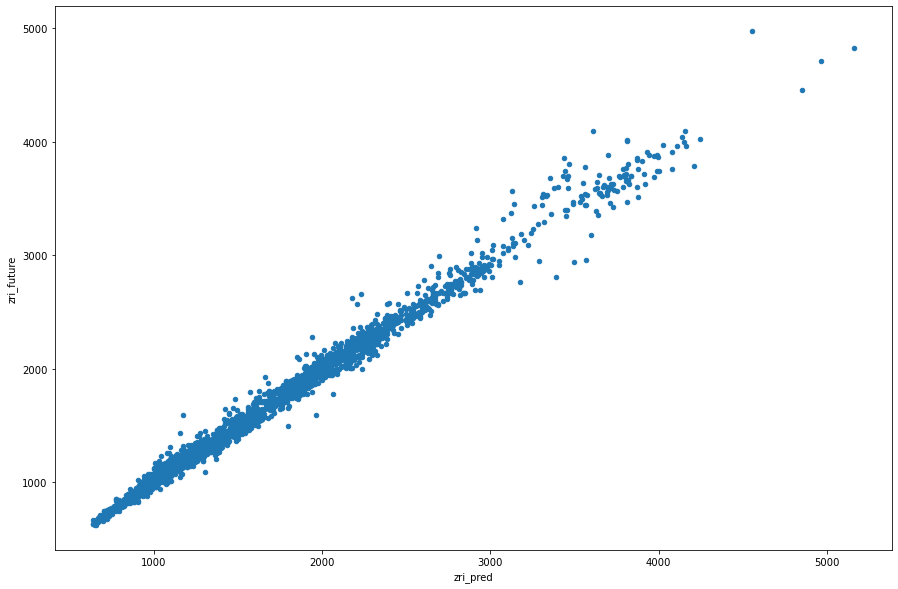

In [163]:
test2.plot(kind='scatter', x='zri_pred', y='zri_future', figsize = (15,10))


## Calculate the ZORI change for years outside the range of ZRI

In [168]:
zori_tot.columns

Index(['RegionName', 'year', 'value'], dtype='object')

In [171]:
zips_unique_that_are_also_in_target = list(target['RegionName'].unique())
len(zips_unique_that_are_also_in_target)

941

In [172]:
zori_new = zori_tot[zori_tot['RegionName'].isin(zips_unique_that_are_also_in_target)]
zori_new

,RegionName,year,value
0,01604,2014,1087.000000
1,01604,2015,1153.583333
2,01604,2016,1220.666667
3,01604,2017,1284.250000
4,01604,2018,1359.416667
...,...,...,...
17315,98498,2017,1135.000000
17316,98498,2018,1216.750000
17317,98498,2019,1282.250000
17318,98498,2020,1362.166667


In [174]:
zori_new = zori_new.groupby('year').mean('value').reset_index()
zori_new

,year,value
0,2014,1537.855626
1,2015,1624.231014
2,2016,1689.509710
3,2017,1736.263431
4,2018,1785.924067
5,2019,1842.976961
6,2020,1849.981145
7,2021,1896.009954


In [175]:
zori_new['zori_change'] = zori_new['value'].pct_change()
zori_new

,year,value,zori_change
0,2014,1537.855626,NaN
1,2015,1624.231014,0.056166
2,2016,1689.509710,0.040191
3,2017,1736.263431,0.027673
4,2018,1785.924067,0.028602
5,2019,1842.976961,0.031946
6,2020,1849.981145,0.003800
7,2021,1896.009954,0.024881


In [216]:
# testing = pd.DataFrame()
# testing['RegionName'] = zips_unique_that_are_also_in_target
# testing
testing = pd.DataFrame(np.repeat(zips_unique_that_are_also_in_target,3,axis=0))
testing.columns = ['RegionName']
testing

,RegionName
0,01104
1,01104
2,01104
3,01108
4,01108
...,...
2818,98498
2819,98498
2820,98499
2821,98499


In [217]:
from itertools import cycle

seq = cycle([2019, 2020, 2021])
testing['year'] = [next(seq) for count in range(testing.shape[0])]
testing

,RegionName,year
0,01104,2019
1,01104,2020
2,01104,2021
3,01108,2019
4,01108,2020
...,...,...
2818,98498,2020
2819,98498,2021
2820,98499,2019
2821,98499,2020


In [189]:
list(target.columns)

['RegionName',
 'year',
 'value',
 'geo_id',
 'nonfamily_households',
 'family_households',
 'median_year_structure_built',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_40_to_50_percent',
 'rent_35_to_40_percent',
 'rent_30_to_35_percent',
 'rent_25_to_30_percent',
 'rent_20_to_25_percent',
 'rent_15_to_20_percent',
 'rent_10_to_15_percent',
 'rent_under_10_percent',
 'total_pop',
 'median_age',
 'commuters_by_public_transportation',
 'households',
 'median_income',
 'income_per_capita',
 'housing_units',
 'vacant_housing_units',
 'vacant_housing_units_for_rent',
 'vacant_housing_units_for_sale',
 'median_rent',
 'percent_income_spent_on_rent',
 'owner_occupied_housing_units',
 'million_dollar_housing_units',
 'mortgaged_housing_units',
 'families_with_young_children',
 'two_parent_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_for

In [194]:
zri_2019 = target[target['year']==2018][['RegionName', 'future_value']]
zri_2019['year'] = 2019
zri_2019

,RegionName,future_value,year
4,01104,1145.583333,2019
12,01108,1201.500000,2019
20,01109,1196.727273,2019
28,01602,1401.333333,2019
36,01603,1325.583333,2019
...,...,...,...
6048,98125,1645.200000,2019
6053,98201,1450.916667,2019
6061,98203,1510.916667,2019
6066,98498,1409.000000,2019


In [218]:
testing = testing.merge(zri_2019, how='left', on=['RegionName', 'year'])

In [219]:
testing.columns = ['RegionName', 'year', 'zri']
testing

,RegionName,year,zri
0,01104,2019,1145.583333
1,01104,2020,NaN
2,01104,2021,NaN
3,01108,2019,1201.500000
4,01108,2020,NaN
...,...,...,...
2818,98498,2020,NaN
2819,98498,2021,NaN
2820,98499,2019,1305.181818
2821,98499,2020,NaN


In [200]:
zri_2020 = zri_2019[['RegionName']]
zri_2020['zri'] = (zri_2019[['future_value']]*0.003800)+zri_2019[['future_value']]
zri_2020['year'] = 2020
zri_2020

<ipython-input-200-d784bfe00e66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zri_2020['zri'] = (zri_2019[['future_value']]*0.003800)+zri_2019[['future_value']]


,RegionName,zri,year
4,01104,1149.936550,2020
12,01108,1206.065700,2020
20,01109,1201.274836,2020
28,01602,1406.658400,2020
36,01603,1330.620550,2020
...,...,...,...
6048,98125,1651.451760,2020
6053,98201,1456.430150,2020
6061,98203,1516.658150,2020
6066,98498,1414.354200,2020


In [220]:
testing = testing.merge(zri_2020, how='left', on=['RegionName', 'year'])
testing

,RegionName,year,zri_x,zri_y
0,01104,2019,1145.583333,NaN
1,01104,2020,NaN,1149.936550
2,01104,2021,NaN,NaN
3,01108,2019,1201.500000,NaN
4,01108,2020,NaN,1206.065700
...,...,...,...,...
2818,98498,2020,NaN,1414.354200
2819,98498,2021,NaN,NaN
2820,98499,2019,1305.181818,NaN
2821,98499,2020,NaN,1310.141509


In [209]:
zri_2021 = zri_2020[['RegionName']]
zri_2021['zri'] = (zri_2020[['zri']]*0.024881)+zri_2020[['zri']]
zri_2021['year'] = 2021
zri_2021

<ipython-input-209-5c149f655905>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zri_2021['zri'] = (zri_2020[['zri']]*0.024881)+zri_2020[['zri']]


,RegionName,zri,year
4,01104,1178.548121,2021
12,01108,1236.073821,2021
20,01109,1231.163756,2021
28,01602,1441.657468,2021
36,01603,1363.727720,2021
...,...,...,...
6048,98125,1692.541531,2021
6053,98201,1492.667589,2021
6061,98203,1554.394121,2021
6066,98498,1449.544747,2021


In [221]:
testing = testing.merge(zri_2021, how='left', on=['RegionName', 'year'])
testing

,RegionName,year,zri_x,zri_y,zri
0,01104,2019,1145.583333,NaN,NaN
1,01104,2020,NaN,1149.936550,NaN
2,01104,2021,NaN,NaN,1178.548121
3,01108,2019,1201.500000,NaN,NaN
4,01108,2020,NaN,1206.065700,NaN
...,...,...,...,...,...
2818,98498,2020,NaN,1414.354200,NaN
2819,98498,2021,NaN,NaN,1449.544747
2820,98499,2019,1305.181818,NaN,NaN
2821,98499,2020,NaN,1310.141509,NaN


In [222]:
testing = testing.fillna(value=0)
testing

,RegionName,year,zri_x,zri_y,zri
0,01104,2019,1145.583333,0.000000,0.000000
1,01104,2020,0.000000,1149.936550,0.000000
2,01104,2021,0.000000,0.000000,1178.548121
3,01108,2019,1201.500000,0.000000,0.000000
4,01108,2020,0.000000,1206.065700,0.000000
...,...,...,...,...,...
2818,98498,2020,0.000000,1414.354200,0.000000
2819,98498,2021,0.000000,0.000000,1449.544747
2820,98499,2019,1305.181818,0.000000,0.000000
2821,98499,2020,0.000000,1310.141509,0.000000


In [223]:
testing['ZRI'] = testing['zri_x']+testing['zri_y']+testing['zri']
testing

,RegionName,year,zri_x,zri_y,zri,ZRI
0,01104,2019,1145.583333,0.000000,0.000000,1145.583333
1,01104,2020,0.000000,1149.936550,0.000000,1149.936550
2,01104,2021,0.000000,0.000000,1178.548121,1178.548121
3,01108,2019,1201.500000,0.000000,0.000000,1201.500000
4,01108,2020,0.000000,1206.065700,0.000000,1206.065700
...,...,...,...,...,...,...
2818,98498,2020,0.000000,1414.354200,0.000000,1414.354200
2819,98498,2021,0.000000,0.000000,1449.544747,1449.544747
2820,98499,2019,1305.181818,0.000000,0.000000,1305.181818
2821,98499,2020,0.000000,1310.141509,0.000000,1310.141509


In [225]:
testing.drop(['zri_x', 'zri_y', 'zri'], axis=1, inplace=True)

KeyError: "['zri_x' 'zri_y' 'zri'] not found in axis"

In [226]:
future_target = testing.copy()
future_target

,RegionName,year,ZRI
0,01104,2019,1145.583333
1,01104,2020,1149.936550
2,01104,2021,1178.548121
3,01108,2019,1201.500000
4,01108,2020,1206.065700
...,...,...,...
2818,98498,2020,1414.354200
2819,98498,2021,1449.544747
2820,98499,2019,1305.181818
2821,98499,2020,1310.141509


## Create a new dataframe for all features with data created from existing years

In [235]:
new_target = target.copy()
new_target.shape

(6047, 158)

In [237]:
new_target.drop(['geo_id', 'City', 'zip'], axis=1, inplace=True)
new_target.shape

(6047, 155)

In [243]:
new_target.drop(['future_value', 'value'], axis=1, inplace=True)
new_target.shape

(6047, 153)

In [244]:
main_list = list(set(new_target.columns) - set(X_train.columns))
main_list

['RegionName']

In [247]:
features = pd.DataFrame(np.repeat(zips_unique_that_are_also_in_target,4,axis=0))
features.columns = ['RegionName']

In [248]:
seq = cycle([2018, 2019, 2020, 2021])
features['year'] = [next(seq) for count in range(features.shape[0])]
features

,RegionName,year
0,01104,2018
1,01104,2019
2,01104,2020
3,01104,2021
4,01108,2018
...,...,...
3759,98498,2021
3760,98499,2018
3761,98499,2019
3762,98499,2020


In [265]:
columns = []
columns += ['RegionName']
columns.extend(list(X_train.columns))
columns
feat_2018 = target[target['year']==2018][columns]
feat_2018['year'] = 2018
feat_2018

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster
4,01104,2018,3478.0,5599.0,1946.0,75.0,1963.0,502.0,202.0,496.0,490.0,393.0,306.0,421.0,68.0,23876.0,35.3,544.0,9077.0,31113.0,20132.0,9664.0,587.0,195.0,96.0,643.0,40.9,4161.0,0.0,2933.0,2043.0,814.0,274.0

In [266]:
features = features.merge(feat_2018, on=['RegionName', 'year'], how='left')
features

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster
0,01104,2018,3478.0,5599.0,1946.0,75.0,1963.0,502.0,202.0,496.0,490.0,393.0,306.0,421.0,68.0,23876.0,35.3,544.0,9077.0,31113.0,20132.0,9664.0,587.0,195.0,96.0,643.0,40.9,4161.0,0.0,2933.0,2043.0,814.0,274.0

In [268]:
new_target

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster
0,01104,2014,3346.0,5526.0,1949.0,158.0,1597.0,523.0,325.0,327.0,603.0,333.0,327.0,340.0,25.0,22285.0,36.1,522.0,8872.0,29184.0,18029.0,9541.0,669.0,210.0,69.0,631.0,38.8,4314.0,0.0,3028.0,1874.0,639.0,448.

In [275]:
new_columns = [x+'_diff' for x in columns]
new_columns

['RegionName_diff',
 'year_diff',
 'nonfamily_households_diff',
 'family_households_diff',
 'median_year_structure_built_diff',
 'rent_burden_not_computed_diff',
 'rent_over_50_percent_diff',
 'rent_40_to_50_percent_diff',
 'rent_35_to_40_percent_diff',
 'rent_30_to_35_percent_diff',
 'rent_25_to_30_percent_diff',
 'rent_20_to_25_percent_diff',
 'rent_15_to_20_percent_diff',
 'rent_10_to_15_percent_diff',
 'rent_under_10_percent_diff',
 'total_pop_diff',
 'median_age_diff',
 'commuters_by_public_transportation_diff',
 'households_diff',
 'median_income_diff',
 'income_per_capita_diff',
 'housing_units_diff',
 'vacant_housing_units_diff',
 'vacant_housing_units_for_rent_diff',
 'vacant_housing_units_for_sale_diff',
 'median_rent_diff',
 'percent_income_spent_on_rent_diff',
 'owner_occupied_housing_units_diff',
 'million_dollar_housing_units_diff',
 'mortgaged_housing_units_diff',
 'families_with_young_children_diff',
 'two_parent_families_with_young_children_diff',
 'two_parents_in_labo

In [307]:
columns.remove('RegionName')
columns.remove('year')

In [317]:
columns

['nonfamily_households',
 'family_households',
 'median_year_structure_built',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_40_to_50_percent',
 'rent_35_to_40_percent',
 'rent_30_to_35_percent',
 'rent_25_to_30_percent',
 'rent_20_to_25_percent',
 'rent_15_to_20_percent',
 'rent_10_to_15_percent',
 'rent_under_10_percent',
 'total_pop',
 'median_age',
 'commuters_by_public_transportation',
 'households',
 'median_income',
 'income_per_capita',
 'housing_units',
 'vacant_housing_units',
 'vacant_housing_units_for_rent',
 'vacant_housing_units_for_sale',
 'median_rent',
 'percent_income_spent_on_rent',
 'owner_occupied_housing_units',
 'million_dollar_housing_units',
 'mortgaged_housing_units',
 'families_with_young_children',
 'two_parent_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_young_children',
 'two_paren

In [318]:
diff = new_target.groupby('RegionName')
diff.head()
test5 = diff[columns].pct_change()

In [319]:
test5 = pd.concat([test5, new_target[['RegionName', 'year']]], axis=1)

In [320]:
test5 = test5.groupby('RegionName').mean()
test5

,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster,year
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01104,0.010352,0.003679,-3.847469e-04,-0.143710,0.0544

In [325]:
test5 = test5.reset_index()

In [382]:
test5

,RegionName,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio,Cluster,year
0,01104,0.010352,0.003679,-3.847469e-04,-0.143710,0.054466,-0.003364,-0.101065,0.113032,-0.050358,0.053999,-0.006528,0.060018,0.461697,0.017671,-0.005085,0.029425,0.005770,0.016496,0.028110,0.003252,-0.0277

In [333]:
columns = []
columns += ['RegionName']
columns.extend(list(X_train.columns))
columns

['RegionName',
 'year',
 'nonfamily_households',
 'family_households',
 'median_year_structure_built',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_40_to_50_percent',
 'rent_35_to_40_percent',
 'rent_30_to_35_percent',
 'rent_25_to_30_percent',
 'rent_20_to_25_percent',
 'rent_15_to_20_percent',
 'rent_10_to_15_percent',
 'rent_under_10_percent',
 'total_pop',
 'median_age',
 'commuters_by_public_transportation',
 'households',
 'median_income',
 'income_per_capita',
 'housing_units',
 'vacant_housing_units',
 'vacant_housing_units_for_rent',
 'vacant_housing_units_for_sale',
 'median_rent',
 'percent_income_spent_on_rent',
 'owner_occupied_housing_units',
 'million_dollar_housing_units',
 'mortgaged_housing_units',
 'families_with_young_children',
 'two_parent_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_youn

In [348]:
print(features[features['year']==2018].shape)
print(test5.shape)
features_2018 = features[features['year']==2018]
features_2018.shape

(941, 153)
(941, 153)


(941, 153)

In [366]:
columns1

Index(['year', 'nonfamily_households', 'family_households',
       'median_year_structure_built', 'rent_burden_not_computed',
       'rent_over_50_percent', 'rent_40_to_50_percent',
       'rent_35_to_40_percent', 'rent_30_to_35_percent',
       'rent_25_to_30_percent',
       ...
       'male_ratio', 'white_ratio', 'black_ratio', 'asian_ratio',
       'hispanic_ratio', 'amerindian_ratio', 'other_race_ratio',
       'employed_ratio', 'civil_labor_ratio', 'Cluster'],
      dtype='object', length=152)

In [378]:
column1 = X_train.columns
column1 = column1.tolist()

In [380]:
column1.remove('year')
column1

['nonfamily_households',
 'family_households',
 'median_year_structure_built',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_40_to_50_percent',
 'rent_35_to_40_percent',
 'rent_30_to_35_percent',
 'rent_25_to_30_percent',
 'rent_20_to_25_percent',
 'rent_15_to_20_percent',
 'rent_10_to_15_percent',
 'rent_under_10_percent',
 'total_pop',
 'median_age',
 'commuters_by_public_transportation',
 'households',
 'median_income',
 'income_per_capita',
 'housing_units',
 'vacant_housing_units',
 'vacant_housing_units_for_rent',
 'vacant_housing_units_for_sale',
 'median_rent',
 'percent_income_spent_on_rent',
 'owner_occupied_housing_units',
 'million_dollar_housing_units',
 'mortgaged_housing_units',
 'families_with_young_children',
 'two_parent_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_young_children',
 'two_paren

In [385]:
features_2018 = features_2018.reset_index()

In [391]:
feat2_2019 = features_2018[['RegionName']]
for col in column1:
    feat2_2019[col] = features_2018[col]*test5[col] + features_2018[col]
feat2_2019['year'] = 2019

<ipython-input-391-3cf81f168f87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat2_2019[col] = features_2018[col]*test5[col] + features_2018[col]
<ipython-input-391-3cf81f168f87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat2_2019['year'] = 2019


In [392]:
feat_2020 = features_2018[['RegionName']]
for col in column1:
    feat_2020[col] = (features_2018[col]*(test5[col]*2)) + features_2018[col]
feat_2020['year'] = 2020

<ipython-input-392-bcc6319f558c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_2020[col] = (features_2018[col]*(test5[col]*2)) + features_2018[col]
<ipython-input-392-bcc6319f558c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_2020['year'] = 2020


In [393]:
feat_2021 = features_2018[['RegionName']]
for col in column1:
    feat_2021[col] = (features_2018[col]*(test5[col]*3)) + features_2018[col]
feat_2021['year'] = 2021

<ipython-input-393-1c4dbbaff056>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_2021[col] = (features_2018[col]*(test5[col]*3)) + features_2018[col]
<ipython-input-393-1c4dbbaff056>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_2021['year'] = 2021


In [396]:
feat_2018 = feat_2018.reset_index()

In [400]:
features2 = pd.concat([feat_2018, feat2_2019, feat_2020, feat_2021])
features2.drop(['index', 'Cluster'], axis=1, inplace=True)
features2

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio
0,01104,2018,3478.000000,5599.000000,1946.000000,75.000000,1963.000000,502.000000,202.000000,496.000000,490.000000,393.000000,306.000000,421.000000,68.000000,23876.000000,35.300000,544.000000,9077.000000,31113.0000

In [401]:
features2 = features2.sort_values(by=['RegionName', 'year'])
features2

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,gini_index,graduate_professional_degree,group_quarters,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,male_male_households,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,amerindian_ratio,other_race_ratio,employed_ratio,civil_labor_ratio
0,01104,2018,3478.000000,5599.000000,1946.000000,75.000000,1963.000000,502.000000,202.000000,496.000000,490.000000,393.000000,306.000000,421.000000,68.000000,23876.000000,35.300000,544.000000,9077.000000,31113.0000

In [406]:
list(zip(features2.columns, features2.isnull().sum()))

[('RegionName', 0),
 ('year', 0),
 ('nonfamily_households', 153),
 ('family_households', 153),
 ('median_year_structure_built', 153),
 ('rent_burden_not_computed', 156),
 ('rent_over_50_percent', 153),
 ('rent_40_to_50_percent', 153),
 ('rent_35_to_40_percent', 153),
 ('rent_30_to_35_percent', 156),
 ('rent_25_to_30_percent', 153),
 ('rent_20_to_25_percent', 153),
 ('rent_15_to_20_percent', 153),
 ('rent_10_to_15_percent', 153),
 ('rent_under_10_percent', 153),
 ('total_pop', 153),
 ('median_age', 153),
 ('commuters_by_public_transportation', 153),
 ('households', 153),
 ('median_income', 153),
 ('income_per_capita', 153),
 ('housing_units', 153),
 ('vacant_housing_units', 153),
 ('vacant_housing_units_for_rent', 153),
 ('vacant_housing_units_for_sale', 192),
 ('median_rent', 153),
 ('percent_income_spent_on_rent', 153),
 ('owner_occupied_housing_units', 153),
 ('million_dollar_housing_units', 348),
 ('mortgaged_housing_units', 153),
 ('families_with_young_children', 153),
 ('two_paren

In [407]:
col_to_drop = ['two_parents_not_in_labor_force_families_with_young_children', 
               'two_parents_mother_in_labor_force_families_with_young_children', 'million_dollar_housing_units', 
               'vacant_housing_units_for_sale', 'father_one_parent_families_with_young_children', 
               'father_in_labor_force_one_parent_families_with_young_children', 'mobile_homes', 'armed_forces', 
               'commuters_by_subway_or_elevated', 'employed_agriculture_forestry_fishing_hunting_mining', 
               'female_female_households', 'group_quarters', 'male_male_households', 'amerindian_ratio', 
               'other_race_ratio']
features2.drop(col_to_drop, axis=1, inplace=True)
features2.shape

(3748, 137)

In [409]:
features3 = features2.dropna()
feature3 = features3[features3['year']>2018]
feature3

,RegionName,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,median_age,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,not_in_labor_force,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,gini_index,graduate_professional_degree,high_school_including_ged,households_public_asst_or_food_stamps,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,less_than_high_school_graduate,management_business_sci_arts_employed,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,cpi,gdp,interest,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,employed_ratio,civil_labor_ratio
0,01104,2019,3514.005750,5619.596240,1945.251283,64.221758,2069.917185,500.311260,181.584777,552.064005,465.324405,414.221425,304.002559,446.267559,99.395402,24297.903217,35.120503,560.007278,9129.372646,31626.250956,20697.909688,9695.423680,570.729860,195.316931,646.080951,41.497605,4125.059000,2913.187802,2091.555573,882.865061,247.079641,668.690385,1230.895431,1537.774142,2206.654037,1766.381794,388.998482,417.891959,359.664391,177647.582151,867.408807,115318.826906,140602.954061,164537.984586,2434.560799,9129.372646,5010.245037,4202.406149,346.164860,2509.339080,852.242321,442.281470,123.446831,168.231416,1090.817672,inf,99.193818,759.130122,15870.986398,2180.783782,221.939826,396.526575,1670.13993

In [410]:
future_target.shape

(2823, 3)

### Regression w/o train-test split

In [358]:
# X = df_comb_red[['zori']]
# y = df_comb_red[['zri']]
# lm2 = LinearRegression()
# lm2.fit(X, y)
# print(f'R-squared: {lm2.score(X, y)}')
# print(f'Coefficient: {lm2.coef_.item()}')

# # similar scores to model w/ train test split

R-squared: 0.8747812596548921
Coefficient: 0.9930531364488863


### Using model to predict ZRI in 2019, 2020, 2021

In [386]:
# # predicted ZRI values for 2019, 2020, 2021 - more or less the same as ZORI
# zri_pred = lm.predict(df_comb2_reg[['zori']])
# df_comb2_reg['zri'] = zri_pred
# df_comb2_reg.drop('pred_zri', inplace=True, axis=1)

In [406]:
# # adding predicted 2019, 2020, 2021 values to original DF
# df_both = df_comb2_reg.dropna()
# df_both.drop('zori', inplace=True, axis=1)

In [407]:
# df_both

,RegionName,year,zri
5,01604,2019,1447.252390
6,01604,2020,1526.409151
7,01604,2021,1644.523293
13,01702,2019,1827.387002
14,01702,2020,1875.410978
...,...,...,...
17326,98661,2020,1361.968432
17327,98661,2021,1459.713784
17357,99207,2019,1222.698901
17358,99207,2020,1287.064578


In [408]:
# zri_yr.columns = ['RegionName', 'year', 'zri']

In [410]:
# zri_yr_pred = pd.concat([zri_yr, df_both])
# zri_yr_pred

,RegionName,year,zri
1,01013,2011,990.916667
2,01013,2012,943.416667
3,01013,2013,923.583333
4,01013,2014,936.083333
5,01013,2015,962.166667
...,...,...,...
17326,98661,2020,1361.968432
17327,98661,2021,1459.713784
17357,99207,2019,1222.698901
17358,99207,2020,1287.064578


In [411]:
# # results are not looking too great - data shows rent indices increased drastically during COVID
# zri_yr_pred.groupby(['year']).mean('zri')

,zri
year,
2011,1290.209356
2012,1328.214445
2013,1388.871012
2014,1407.012454
2015,1495.591122
2016,1567.840579
2017,1601.459923
2018,1619.204802
2019,1821.581346
